In [4]:
# Ensure that the necessary libraries are imported at the top of your script.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
import nltk
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [5]:
# Load dataset
data = pd.read_csv('rotten_tomatoes_reviews.csv')
display(data)


,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8530 entries, 0 to 8529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8530 non-null   object
 1   label   8530 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.4+ KB


In [7]:

data.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
# Cleaning text
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'https\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^A-Za-z]+', ' ', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

data['cleaning'] = data['text'].apply(cleaningText)

In [9]:
# Tokenize text
def tokenize_text(text):
    return text.split()

data['tokens'] = data['cleaning'].apply(lambda x: tokenize_text(x))


In [10]:
# Stopwords removal
# Download stopwords untuk bahasa Indonesia dan Inggris
nltk.download('stopwords')

# Ambil kumpulan stopwords bahasa Indonesia
stop_words_indonesian = set(stopwords.words('indonesian'))

# Ambil kumpulan stopwords bahasa Inggris
stop_words_english = set(stopwords.words('english'))

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text):
    filtered_text = [word for word in text if word.lower() not in stop_words_indonesian and word.lower() not in stop_words_english]
    return filtered_text

# Terapkan fungsi pada kolom 'Lyrics_token'
data['tokens'] = data['tokens'].apply(remove_stopwords)
data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,cleaning,tokens
0,the rock is destined to be the 21st century's ...,1,the rock is destined to be the st century s ne...,"[rock, destined, st, century, new, conan, goin..."
1,"the gorgeously elaborate continuation of "" the...",1,the gorgeously elaborate continuation of the l...,"[gorgeously, elaborate, continuation, lord, ri..."
2,effective but too-tepid biopic,1,effective but too tepid biopic,"[effective, tepid, biopic]"
3,if you sometimes like to go to the movies to h...,1,if you sometimes like to go to the movies to h...,"[sometimes, like, go, movies, fun, wasabi, goo..."
4,"emerges as something rare , an issue movie tha...",1,emerges as something rare an issue movie that ...,"[emerges, something, rare, issue, movie, hones..."
...,...,...,...,...
8525,any enjoyment will be hinge from a personal th...,0,any enjoyment will be hinge from a personal th...,"[enjoyment, hinge, personal, threshold, watchi..."
8526,if legendary shlockmeister ed wood had ever ma...,0,if legendary shlockmeister ed wood had ever ma...,"[legendary, shlockmeister, ed, wood, ever, mad..."
8527,hardly a nuanced portrait of a young woman's b...,0,hardly a nuanced portrait of a young woman s b...,"[hardly, nuanced, portrait, young, woman, brea..."
8528,"interminably bleak , to say nothing of boring .",0,interminably bleak to say nothing of boring,"[interminably, bleak, say, nothing, boring]"


In [11]:
# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text]

data['lemma_review'] = data['tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
# Remove short tokens
def remove_short_tokens(tokens):
    return [token for token in tokens if len(token) > 3]

data['Text_string'] = data['lemma_review'].apply(remove_short_tokens).apply(lambda x: ' '.join(x))

data

,text,label,cleaning,tokens,lemma_review,Text_string
0,the rock is destined to be the 21st century's ...,1,the rock is destined to be the st century s ne...,"[rock, destined, st, century, new, conan, goin...","[rock, destined, st, century, new, conan, goin...",rock destined century conan going make splash ...
1,"the gorgeously elaborate continuation of "" the...",1,the gorgeously elaborate continuation of the l...,"[gorgeously, elaborate, continuation, lord, ri...","[gorgeously, elaborate, continuation, lord, ri...",gorgeously elaborate continuation lord ring tr...
2,effective but too-tepid biopic,1,effective but too tepid biopic,"[effective, tepid, biopic]","[effective, tepid, biopic]",effective tepid biopic
3,if you sometimes like to go to the movies to h...,1,if you sometimes like to go to the movies to h...,"[sometimes, like, go, movies, fun, wasabi, goo...","[sometimes, like, go, movie, fun, wasabi, good...",sometimes like movie wasabi good place start
4,"emerges as something rare , an issue movie tha...",1,emerges as something rare an issue movie that ...,"[emerges, something, rare, issue, movie, hones...","[emerges, something, rare, issue, movie, hones...",emerges something rare issue movie honest keen...
...,...,...,...,...,...,...
8525,any enjoyment will be hinge from a personal th...,0,any enjoyment will be hinge from a personal th...,"[enjoyment, hinge, personal, threshold, watchi...","[enjoyment, hinge, personal, threshold, watchi...",enjoyment hinge personal threshold watching en...
8526,if legendary shlockmeister ed wood had ever ma...,0,if legendary shlockmeister ed wood had ever ma...,"[legendary, shlockmeister, ed, wood, ever, mad...","[legendary, shlockmeister, ed, wood, ever, mad...",legendary shlockmeister wood ever made movie v...
8527,hardly a nuanced portrait of a young woman's b...,0,hardly a nuanced portrait of a young woman s b...,"[hardly, nuanced, portrait, young, woman, brea...","[hardly, nuanced, portrait, young, woman, brea...",hardly nuanced portrait young woman breakdown ...
8528,"interminably bleak , to say nothing of boring .",0,interminably bleak to say nothing of boring,"[interminably, bleak, say, nothing, boring]","[interminably, bleak, say, nothing, boring]",interminably bleak nothing boring


In [13]:
# Lowercase transformation

data['Text_string'] = data['Text_string'].astype('str')
data['Text_string'] = data['Text_string'].astype(pd.StringDtype())
data.dtypes

text                    object
label                    int64
cleaning                object
tokens                  object
lemma_review            object
Text_string     string[python]
dtype: object

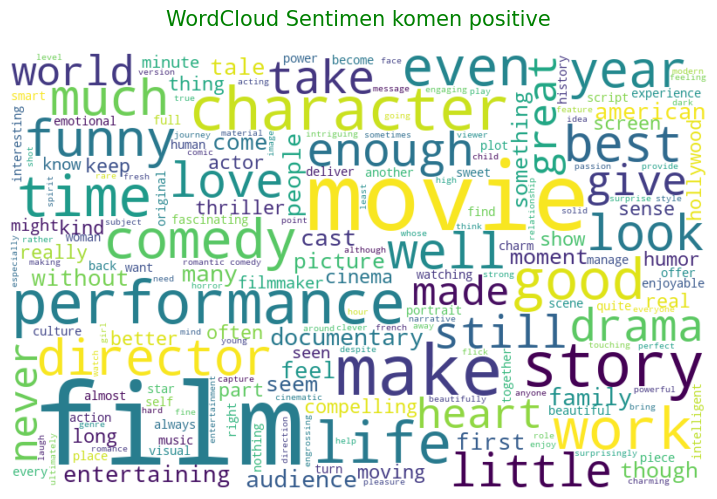

In [14]:
# WordCloud untuk komentar positif
# Filter DataFrame untuk sentimen very populer
data_popular = data[data['label'] == 1]

# Gabungkan semua teks dalam kolom 'Text_string' untuk sentimen positive
all_words_popular = ' '.join(data_popular['Text_string'])

# Buat WordCloud untuk sentimen very komentae positive
wordcloud_popular = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130, colormap='viridis').generate(all_words_popular)

# Tampilkan WordCloud
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud_popular, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen komen positive', fontsize=15, pad=20, color='green')
plt.show()

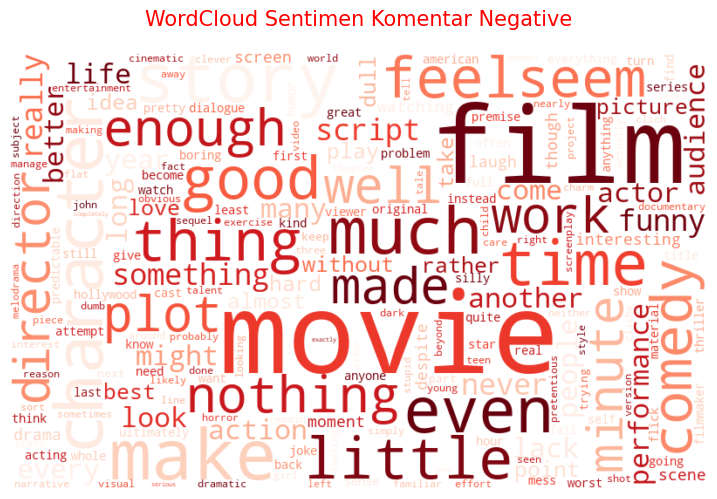

In [15]:
# WordCloud untuk komentar negatif
data_negative = data[data['label'] == 0]
all_words_negative = ' '.join(data_negative['Text_string'])
wordcloud_negative = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130, colormap='Reds').generate(all_words_negative)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Komentar Negative', fontsize=15, pad=20, color='red')
plt.show()

In [16]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = data['Text_string']
y = data['label']
X_final = tfidf_vectorizer.fit_transform(X)
print(X_final)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 81857 stored elements and shape (8530, 14094)>
  Coords	Values
  (0, 10528)	0.21859317198790001
  (0, 3235)	0.2690391720477949
  (0, 1846)	0.22678694254050352
  (0, 2380)	0.2876139185291971
  (0, 5329)	0.18988220911879977
  (0, 7531)	0.13266902328691624
  (0, 11696)	0.2690391720477949
  (0, 4250)	0.143759373188971
  (0, 5449)	0.2646070030154314
  (0, 618)	0.24603225653402921
  (0, 10831)	0.2572004305348503
  (0, 6754)	0.2572004305348503
  (0, 2092)	0.3106208340429628
  (0, 2889)	0.29716265121015
  (0, 11890)	0.23419351502108463
  (0, 10939)	0.3106208340429628
  (1, 5364)	0.2369515498162552
  (1, 3879)	0.23252932723102562
  (1, 2536)	0.25683632178219995
  (1, 7379)	0.24218192899545798
  (1, 10488)	0.19967815884928714
  (1, 12898)	0.24218192899545798
  (1, 6010)	0.20543493191484147
  (1, 2257)	0.24858339575172422
  (1, 13962)	0.1847641474408586
  :	:
  (8526, 11148)	0.2937459279620324
  (8526, 304)	0.2937459279620324
  (8527, 

In [17]:
pickle.dump(tfidf_vectorizer, open("tf_idf_vectorizer.pkl", "wb"))

In [18]:
# Handling imbalanced using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_final, y)
print("Jumlah sampel untuk setiap kelas:")
print(y_sm.value_counts())

Jumlah sampel untuk setiap kelas:
label
1    4265
0    4265
Name: count, dtype: int64


In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(type(X_train))  # Harusnya <class 'scipy.sparse._csr.csr_matrix'>
print(type(X_test))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


Accuracy: 0.7584994138335287
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       848
           1       0.78      0.73      0.75       858

    accuracy                           0.76      1706
   macro avg       0.76      0.76      0.76      1706
weighted avg       0.76      0.76      0.76      1706



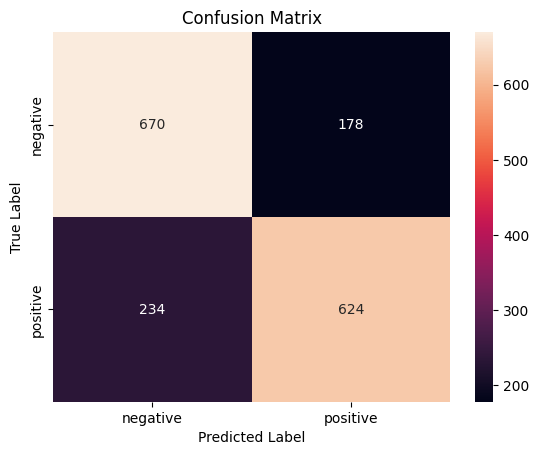

In [20]:
# Algoritma SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["negative", "positive"], columns=["negative", "positive"])
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
if hasattr(svm_model, "support_vectors_"):
    print("Model is fitted.")
else:
    print("Model is not fitted.")

Model is fitted.


In [22]:
# Cross Validation
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(svm_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning: ", accuracy)
pickle.dump(best_model, open("svm_model.pkl", "wb"))

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy after hyperparameter tuning:  0.761430246189918


In [27]:
def preprocess_text(text):
    tokens = tokenize_text(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words_indonesian and word.lower() not in stop_words_english]
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join([token for token in lemmatized_text if len(token) > 3])

# Fungsi untuk memprediksi popularitas dari input komentar netizen
def predict_komentar(komen):
    # Preprocessing input komentar
    cleaned_komen = cleaningText(komen)
    processed_komen = preprocess_text(cleaned_komen)

    # Konversi komen yang sudah di-preprocess ke fitur TF-IDF
    input_vector = tfidf_vectorizer.transform([processed_komen])

    # Prediksi sentimen Komentar
    prediction = svm_model.predict(input_vector)[0]

    # Interpretasi hasil prediksi
    if prediction == 1:
        return "Tanggapan Positive"
    else :
        return "Tanggapan Negative"

In [28]:
# Fungsi main untuk pengujian manual
def main():
    print("Selamat datang di prediktor komentar positif dan negatif!")
    print("Silakan masukkan komentar yang ingin diuji (ketik 'EXIT' untuk keluar):\n")
    while True:
        new_komen = input("Masukkan komentar: ")
        if new_komen.strip().upper() == "EXIT":
            print("Terima kasih! Program telah selesai.")
            break
        predicted_komentar = predict_komentar(new_komen)
        print(f"Prediksi Komentar: {predicted_komentar}\n")

# Menjalankan fungsi main
main()

Selamat datang di prediktor komentar positif dan negatif!
Silakan masukkan komentar yang ingin diuji (ketik 'EXIT' untuk keluar):

Prediksi Komentar: Tanggapan Negative

Prediksi Komentar: Tanggapan Positive

Terima kasih! Program telah selesai.


In [29]:
filename = 'prediksi_Tanggapan.pkl'
pickle.dump(svm_model, open(filename, 'wb'))